## parallel slop linear regression

In [2]:
import pandas as pd

df_fish = pd.read_csv("fish.csv")
df_fish["species"].unique()

array(['Bream', 'Roach', 'Perch', 'Pike'], dtype=object)

In [9]:
from statsmodels.formula.api import ols

#modelos
mdl_peso_long = ols('mass_g~length_cm',data=df_fish).fit()
mdl_peso_especie = ols('mass_g~species',data=df_fish).fit()
mdl_both = ols('mass_g~length_cm+species+0',data=df_fish).fit()
mdl_both.params

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64

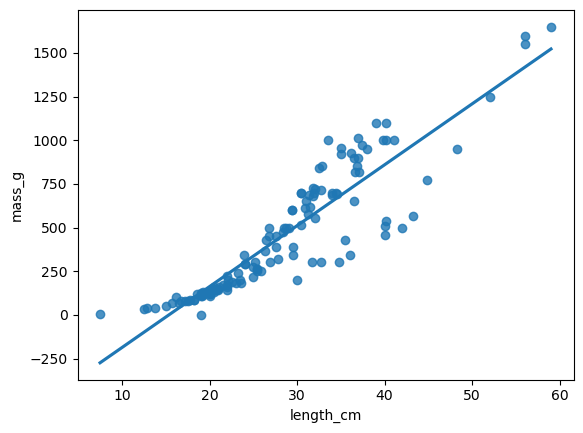

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='length_cm',y='mass_g',data=df_fish,ci=None)
plt.show()

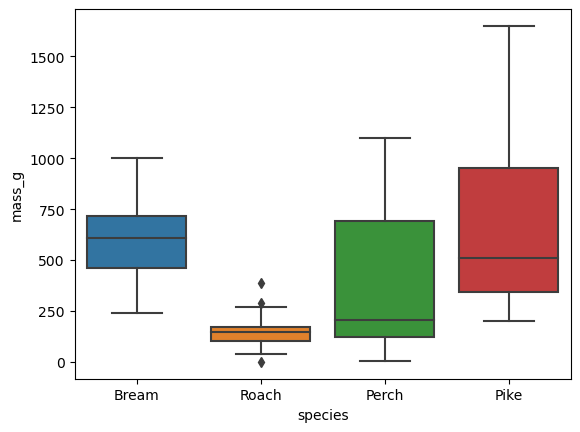

In [8]:
sns.boxplot(data=df_fish,y='mass_g',x='species')
plt.show()

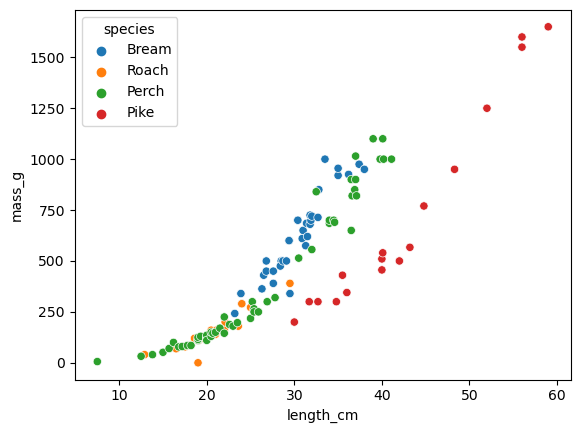

In [11]:
sns.scatterplot(x='length_cm',y='mass_g',hue='species',data=df_fish,ci=None)
plt.show()

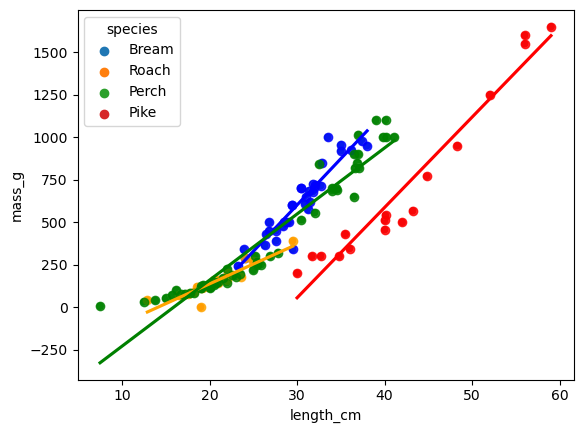

In [26]:
coeff = mdl_both.params

sp_bream, sp_roach,sp_perch,sp_pike,pend = coeff

sns.scatterplot(x='length_cm',y='mass_g',hue='species',data=df_fish,ci=None)
sns.regplot(x='length_cm',y='mass_g',data=df_fish[df_fish["species"]=='Bream'],ci=None, color = 'blue')
sns.regplot(x='length_cm',y='mass_g',data=df_fish[df_fish["species"]=='Roach'],ci=None, color = 'orange')
sns.regplot(x='length_cm',y='mass_g',data=df_fish[df_fish["species"]=='Perch'],ci=None, color = 'green')
sns.regplot(x='length_cm',y='mass_g',data=df_fish[df_fish["species"]=='Pike'],ci=None, color = 'red')
plt.show()

In [31]:

df_pred = pd.DataFrame({'species':['Pike'],'length_cm':[55]})

df_predicted = df_pred.assign(mass_g=mdl_both.predict(df_pred))
df_predicted.head()

,species,length_cm,mass_g
0,Pike,55,1251.814421


In [34]:
from itertools import product
import numpy as np
length = np.arange(10,50,5)
species = df_fish['species'].unique()

comb = product(length,species)

df = pd.DataFrame(comb,columns=['length','species'])
df_predicted = df.assign(mass_g=mdl_both.predict(df))
df_predicted.head()

TypeError: __init__() got an unexpected keyword argument 'Columns'